In [49]:
import numpy as np

In [2]:
image_output = np.array([0.72, -0.23, 1.4, 2.2, -2.3, 0.1, 0.2, 0.5])

In [54]:
def image_to_song(image):
    # song         image
    # "solemnity", fear
    # "tenderness", amusement
    # "nostalgia", awe
    # "calmness", contentment
    # "power", anger
    # "joyful activation", excitement
    # "tension", disgust
    # "sadness" sadness
    
    # image order 
    #     labels = [
    #         'amusement',
    #         'anger',
    #         'awe',
    #         'contentment',
    #         'disgust',
    #         'excitement',
    #         'fear',
    #         'sadness'
    #     ]
    
    amusement = image[:, 0]
    anger = image[:, 1]
    awe = image[:, 2]
    contentment = image[:, 3]
    disgust = image[:, 4]
    excitement = image[:, 5]
    fear = image[:, 6]
    sadness = image[:, 7]
    
    song = [
        fear,
        amusement,
        awe,
        contentment,
        anger,
        excitement,
        disgust,
        sadness
    ]
    
    return np.column_stack(song)

In [4]:
test_songs = image_to_song(np.stack([image_output, image_output + 3]))
test_songs

array([[ 0.2 ,  0.72,  1.4 ,  2.2 , -0.23,  0.1 , -2.3 ,  0.5 ],
       [ 3.2 ,  3.72,  4.4 ,  5.2 ,  2.77,  3.1 ,  0.7 ,  3.5 ]])

In [53]:
def closest_song(song, all_songs, labels):
    distances = np.linalg.norm(all_songs-song, axis=1)
    return labels[np.argmin(distances)]

In [6]:
closest_song(np.array([0, 0, 1, 2, 2, 0, -2, 0]), test_songs, ['random song A', 'giraffe'])

'random song A'

# Predict

In [1]:
import os

In [43]:
songs = []
for filename in os.listdir('./Songs'):
    if filename.endswith('.mp3'):
        songs.append('./Songs/' + filename)
songs

['./Songs/Dame Da Ne.mp3',
 './Songs/National Anthem of USSR.mp3',
 './Songs/A$AP Rocky - L$D (LOVE x $EX x DREAMS).mp3',
 './Songs/BTS(방탄소년단)DOPE(쩔어).mp3',
 './Songs/Noak Hellsing - Lost.mp3',
 './Songs/Gurenge - Lisa.mp3',
 './Songs/Mac Miller - Good News.mp3',
 './Songs/Bastille - Those Nights.mp3',
 './Songs/Martin Garrix feat. Macklemore & Patrick Stump of Fall Out Boy - Summer Days.mp3',
 './Songs/Lauv - Changes.mp3',
 './Songs/ODESZA - Line Of Sight (feat. WYNNE & Mansionair).mp3',
 './Songs/Never Gonna Give You Up.mp3',
 './Songs/In The End - Linkin Park.mp3',
 './Songs/Lauv - Sims.mp3',
 './Songs/Doja Cat - Say So.mp3',
 './Songs/Lil Mosey - Blueberry Faygo (Dir. by ColeBennett).mp3',
 './Songs/Sheck Wes - Mo Bamba.mp3',
 './Songs/마마무 (MAMAMOO) - 딩가딩가 (Dingga).mp3',
 './Songs/Disturbed - The Sound Of Silence.mp3',
 './Songs/Steve Jablonsky - Arrival To Earth.mp3',
 './Songs/LeeSSang(리쌍) Pursuing The Happiness(행복을 찾아서) (Feat. Jo Hyuna of Urban Zakapa).mp3',
 "./Songs/Richard Cl

In [19]:
# quick hack
import sys
sys.path.insert(1, './SongEmotionModel/cloudfunction')
import main as sem
import torch.nn.functional as F

In [20]:
def predict_song(path):
    image = sem.song_to_image(path)
    out = sem.model_conv(image)
    softmax_out = F.softmax(out)
    return softmax_out.tolist()[0]

/home/smxu/memories/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


('./Songs/Dame Da Ne.mp3',
 [0.08135166764259338,
  0.04336877167224884,
  0.5321084856987,
  0.011995078064501286,
  0.12835630774497986,
  0.16865086555480957,
  0.02240850031375885,
  0.01176037173718214])

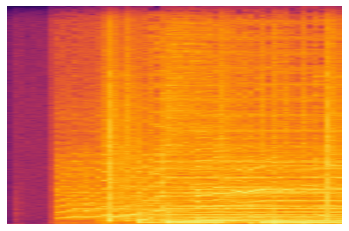

In [45]:
songs[0], predict_song(songs[0])

/home/smxu/memories/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/home/smxu/memories/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an a

/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/home/smxu/memories/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sy

/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/home/smxu/memories/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: War

/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/smxu/memories/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removi

/home/smxu/memories/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/home/smxu/memories/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/smxu/memories/venv/lib/python3.6/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/smxu/memories/venv/lib/p

[[0.08135166764259338,
  0.04336877167224884,
  0.5321084856987,
  0.011995078064501286,
  0.12835630774497986,
  0.16865086555480957,
  0.02240850031375885,
  0.01176037173718214],
 [0.06995171308517456,
  0.029827609658241272,
  0.35480940341949463,
  0.009526905603706837,
  0.07423509657382965,
  0.38734152913093567,
  0.06787853688001633,
  0.0064292047172784805],
 [0.2948155403137207,
  0.024665385484695435,
  0.08877885341644287,
  0.026507604867219925,
  0.4266516864299774,
  0.116752989590168,
  0.01724783517420292,
  0.004580083303153515],
 [0.0821915790438652,
  0.025134939700365067,
  0.2092188000679016,
  0.018801789730787277,
  0.2581463158130646,
  0.3774268627166748,
  0.019192717969417572,
  0.009886987507343292],
 [0.16910454630851746,
  0.03304067999124527,
  0.2017359733581543,
  0.009505491703748703,
  0.4237564504146576,
  0.14248871803283691,
  0.010969246737658978,
  0.009398800320923328],
 [0.043832335621118546,
  0.08426789939403534,
  0.35601484775543213,
  0.

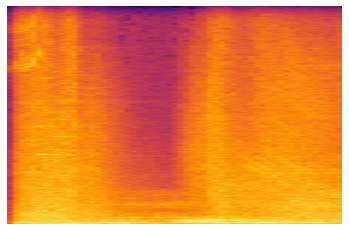

In [46]:
song_vectors = []
for song in songs:
    song_vectors.append(predict_song(song))
song_vectors

In [51]:
song_array = np.array(song_vectors)
song_array

array([[0.08135167, 0.04336877, 0.53210849, 0.01199508, 0.12835631,
        0.16865087, 0.0224085 , 0.01176037],
       [0.06995171, 0.02982761, 0.3548094 , 0.00952691, 0.0742351 ,
        0.38734153, 0.06787854, 0.0064292 ],
       [0.29481554, 0.02466539, 0.08877885, 0.0265076 , 0.42665169,
        0.11675299, 0.01724784, 0.00458008],
       [0.08219158, 0.02513494, 0.2092188 , 0.01880179, 0.25814632,
        0.37742686, 0.01919272, 0.00988699],
       [0.16910455, 0.03304068, 0.20173597, 0.00950549, 0.42375645,
        0.14248872, 0.01096925, 0.0093988 ],
       [0.04383234, 0.0842679 , 0.35601485, 0.01533763, 0.10773828,
        0.36893433, 0.01477736, 0.00909731],
       [0.20753318, 0.05617297, 0.15453734, 0.01132679, 0.33493322,
        0.16774066, 0.06230642, 0.00544939],
       [0.11463767, 0.05043033, 0.28537813, 0.0109311 , 0.21885538,
        0.24383715, 0.06662045, 0.00930984],
       [0.15020396, 0.03147527, 0.33966449, 0.01133977, 0.26973709,
        0.16054428, 0.026808

In [55]:
closest_song(np.array([0, 0, 1, 2, 2, 0, -2, 0]), song_array, songs)

'./Songs/Dreamville - Down Bad feat. J.I.D, Bas, J. Cole, EarthGang, & Young Nudy.mp3'

In [57]:
np.save('./songs.npy', song_array)

In [59]:
[song.strip('./Songs/').strip('.mp3') for song in songs]

['Dame Da Ne',
 'National Anthem of USSR',
 'A$AP Rocky - L$D (LOVE x $EX x DREAMS)',
 'BTS(방탄소년단)DOPE(쩔어)',
 'Noak Hellsing - Lost',
 'Gurenge - Lisa',
 'Mac Miller - Good News',
 'Bastille - Those Nights',
 'Martin Garrix feat. Macklemore & Patrick Stump of Fall Out Boy - Summer Days',
 'Lauv - Changes',
 'ODESZA - Line Of Sight (feat. WYNNE & Mansionair)',
 'Never Gonna Give You U',
 'In The End - Linkin Park',
 'Lauv - Sims',
 'Doja Cat - Say So',
 'Lil Mosey - Blueberry Faygo (Dir. by ColeBennett)',
 'heck Wes - Mo Bamba',
 '마마무 (MAMAMOO) - 딩가딩가 (Dingga)',
 'Disturbed - The Sound Of Silence',
 'teve Jablonsky - Arrival To Earth',
 'LeeSSang(리쌍) Pursuing The Happiness(행복을 찾아서) (Feat. Jo Hyuna of Urban Zakapa)',
 "Richard Clayderman - Mariage d'amour",
 'Jake Scott - Man Who Stays',
 'Pharrell Williams - Happy',
 'love ride - christian french',
 'Justin Bieber & benny blanco - Lonely',
 'DaBaby - BOP on Broadway',
 'am Smith - To Die For',
 'Emilee - Heaven',
 'Rich & Sad',
 'John B

In [64]:
def predict(image):
    # predict a song given a
    song = image_to_song(image)
    return closest_song(song, song_array, songs)

In [65]:
predict(np.array([[0, 0, 1, 2, 2, 0, -2, 0]]))

'./Songs/Dame Da Ne.mp3'